In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
np.random.seed(30)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter
import keras
from keras.layers import Conv2D,Dense,Flatten
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from keras.layers import Input
from keras.models import Model

/home/rithwik/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def load_data(string,n_months,path='../Datasets for Mid Sem Presentation/'):
    
    X = np.load(path+string+"_x.npy")
    y = np.load(path+string+"_y.npy")
    
    print (X.shape,y.shape)
    
    X = X.reshape((len(X),4,7))/(1000*1.0)
    y = y.reshape((len(y),4,168))/(1000*1.0)
    y = y.reshape((-1,168*4))
    X = np.expand_dims(X,axis=3)
    
    
    
    
    return X,y
        
    
    
    
def relative_cost(truth,pred):
    return np.mean(abs(pred-truth)/(.001+truth))




def relative_metric(truth,pred):
    return K.mean(abs(pred-truth)/(.001+truth))





def mse(truth,pred):
    return np.mean(1000*np.sqrt((truth-pred)**2))

In [4]:
def network():
    
    input_layer = Input(shape=(4,7,1),name="Monthly_Matrix")
    input_layer_2 = Input(shape=(1,),name="Cooling_Degree_Day_Monthly")
    

    op1 = Conv2D(10,kernel_size=(4,1), strides=(1,1),name="Filter_4X1")(input_layer)
    
    op1 = Flatten()(op1)
    
    
    
    op2 = Conv2D(10,kernel_size=(1,7), strides=(1,1),name="Filter_1X7")(input_layer)
    
    op2 = Flatten()(op2)
    
    
    op3 = Conv2D(10,kernel_size=(1,2),strides=(1,1),name="Filter_1X2")(input_layer)
    
    op3 = Flatten()(op3)
    
    op4 = Conv2D(10,kernel_size=(2,1),strides=(1,1),name="Filter_2X1")(input_layer)
    
    op4 = Flatten()(op4)
    
    #op5 = Conv2D(20,kernel_size=(3,3),strides=(1,1),padding='same')(input_layer)
    
    #op5 = Conv2D(20,3,strides=(1,1),padding='same')(input_layer)
    
    #op5 = Flatten()(op5)
    
    #op5 =  keras.layers.Dropout(.2)(op5)
    
    #op5  = Dense(168*4)(op5)
    
    
    
    
    
    
    
    
    
    merge_layer = keras.layers.concatenate([op1, op2, op3,op4],name="Concatenation_1")
    

    
    merge_layer =  keras.layers.Dropout(.1)(merge_layer)
    
    
    
    merge_layer = keras.layers.concatenate(([merge_layer,input_layer_2]),name="Concatenation_2")
    
    final_layer = Dense(168*4,name="Output_Dense",activation='relu')(merge_layer)
    
    
    #final_layer = keras.layers.LeakyReLU(alpha=0.01)(final_layer)
    
    #predictions = Dense(1, activation='sigmoid')(merge_layer)

    
    
    
    model = Model(inputs=[input_layer,input_layer_2], outputs=final_layer)

    
    return model
    
    

In [1]:
test_x,test_y = load_data('test_data',1)
train_x,train_y = load_data("train_data_1",3)
v_x,v_y = load_data("val_data_2",3)

NameError: name 'load_data' is not defined

In [5]:
vals = [16,18,21]

In [6]:
train_temp = np.array(vals*(len(train_x)/3))
v_temp = np.array(vals*(len(v_x)/3))
test_temp = np.array([vals[1]]*(len(test_x)))

In [7]:
test_temp.shape

(18,)

In [8]:
#test_x[0]

In [9]:
model = network()

In [32]:
dir_name = "HVAC/Multiple Month CNN Multiple Filters Temp Term"

In [35]:
#model = network()
n_epochs = 300
sgd = keras.optimizers.SGD(lr=0.01)
rmsprop  = keras.optimizers.RMSprop(lr=.001)
adagrad = keras.optimizers.adagrad(lr=.001)
model.compile(optimizer=sgd, loss='mean_squared_error',metrics=[relative_metric])
filepath="weights.best.h5"
checkpoint = ModelCheckpoint(dir_name+'/single-model-{epoch:03d}.h5', verbose=5, monitor='val_loss',save_best_only=True, mode='auto')  
model.fit([train_x,train_temp], train_y, epochs=n_epochs, validation_data=[[v_x,v_temp],v_y], callbacks=[checkpoint], verbose=5)

Train on 207 samples, validate on 57 samples
Epoch 1/300

Epoch 00001: val_loss improved from inf to 0.29650, saving model to HVAC/Multiple Month CNN Multiple Filters Temp Term/single-model-001.h5
Epoch 2/300

Epoch 00002: val_loss did not improve
Epoch 3/300

Epoch 00003: val_loss did not improve
Epoch 4/300

Epoch 00004: val_loss improved from 0.29650 to 0.29650, saving model to HVAC/Multiple Month CNN Multiple Filters Temp Term/single-model-004.h5
Epoch 5/300

Epoch 00005: val_loss did not improve
Epoch 6/300

Epoch 00006: val_loss did not improve
Epoch 7/300

Epoch 00007: val_loss did not improve
Epoch 8/300

Epoch 00008: val_loss did not improve
Epoch 9/300

Epoch 00009: val_loss did not improve
Epoch 10/300

Epoch 00010: val_loss did not improve
Epoch 11/300

Epoch 00011: val_loss did not improve
Epoch 12/300

Epoch 00012: val_loss improved from 0.29650 to 0.29650, saving model to HVAC/Multiple Month CNN Multiple Filters Temp Term/single-model-012.h5
Epoch 13/300

Epoch 00013: va

In [36]:
all_files = os.listdir(dir_name)
all_files.sort()
weights_file = all_files[-1]

In [16]:
weights_file = 'single-model-990.h5'

In [37]:
model.load_weights(dir_name+"/"+weights_file)

In [18]:
test_x[0].sum()

511.58536

In [43]:
pred_train = model.predict([train_x,train_temp])
pred_v = model.predict([v_x,v_temp])
pred_test = model.predict([test_x,test_temp])

In [44]:
s/len(train_x)

NameError: name 's' is not defined

In [45]:
train_cost = relative_cost(train_y,pred_train)
v_cost = relative_cost(v_y,pred_v)
test_cost = relative_cost(test_y,pred_test)

In [46]:
train_cost,test_cost,v_cost

(0.38498348, 1.234709, 0.67739594)

In [47]:
train_cost = mse(train_y,pred_train)
v_cost = mse(v_y,pred_v)
test_cost = mse(test_y,pred_test)

In [48]:
train_cost,test_cost,v_cost

(188.01614, 199.00262, 279.89944)

In [23]:
model.save_weights("WOrking model with temp.h5")

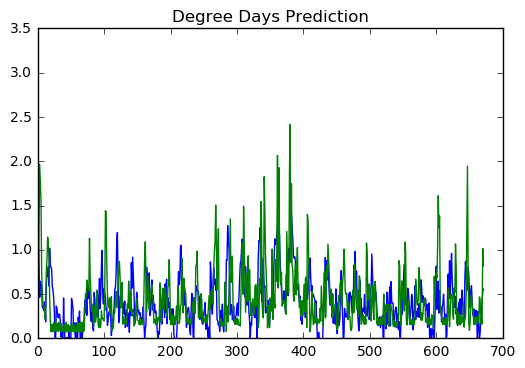

In [25]:
plt.close('all')
plt.plot(np.arange(672),model.predict([test_x,test_temp])[21])
plt.plot(np.arange(672),test_y[21])
plt.title("Degree Days Prediction")
plt.ylim([0,3.5])
plt.show()

In [26]:
relative_cost(test_y[21],model.predict([test_x,test_temp])[21])

0.80985785

In [134]:
relative_cost(test_y[0:3],model.predict(test_x)[0:3])

1.1072702

In [21]:
train_cost = ((train_y - pred_train) ** 2).mean()
v_cost =  ((v_y - pred_v) ** 2).mean()
test_cost =  ((test_y - pred_test) ** 2).mean()

In [22]:
train_cost,test_cost,v_cost

(0.0033304102, 0.0031321736, 0.0054545933)

In [23]:
new_df = pd.DataFrame([['MSE',appliance,train_cost,v_cost,test_cost]])
    
    
results = pd.concat([results,new_df])

NameError: name 'appliance' is not defined

In [24]:
results_df

NameError: name 'results_df' is not defined

In [25]:

test_input = test_x[-3]
test_truth = test_y[-3]
pred = model.predict(np.array([test_input]))


In [26]:
np.save('truth_1.txt',test_truth)
np.save('input_1.txt',test_input)
np.save('pred_single_month_input_1.txt',pred[0])

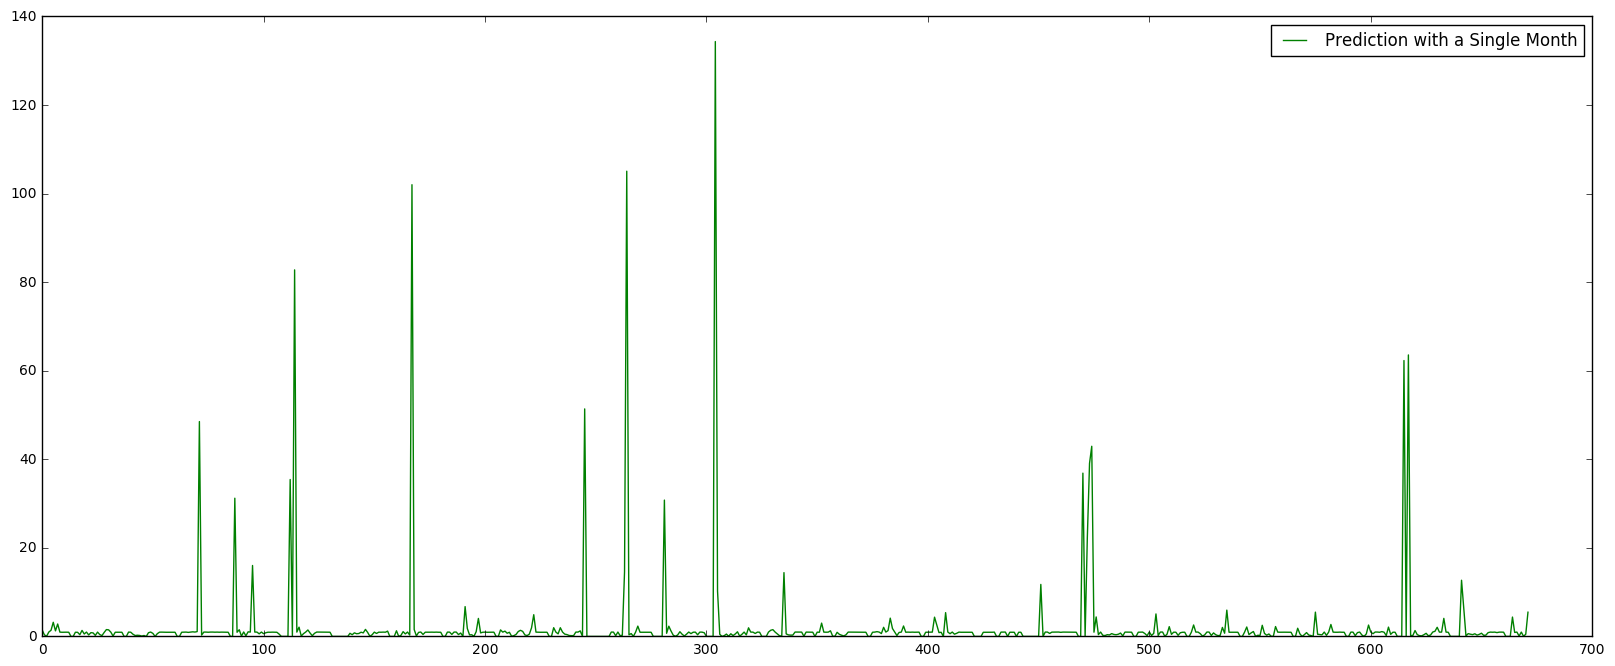

2.2075098


In [29]:
plt.close('all')
plt.figure(figsize=(20,8))
#plt.plot(np.arange(168*4),test_truth,'r',label="Truth")
plt.plot(np.arange(168*4),np.abs(pred[0] - test_truth)/(.001+test_truth),'g',label='Prediction with a Single Month')
plt.legend()
plt.show()
print (relative_cost(test_truth,pred[0]))


In [28]:
X[0]

array([[[2.0885367],
        [1.7552983],
        [2.8417618],
        [1.3944267],
        [1.7293551],
        [2.2343967],
        [1.6603967]],

       [[1.9804666],
        [1.65768  ],
        [1.6181266],
        [1.4750117],
        [1.4883684],
        [2.4280133],
        [2.259585 ]],

       [[1.90035  ],
        [1.9859867],
        [1.8725467],
        [1.4924116],
        [1.2054284],
        [1.908915 ],
        [1.967745 ]],

       [[1.8604566],
        [1.92769  ],
        [2.0199618],
        [1.9734467],
        [1.661325 ],
        [2.6458566],
        [2.06919  ]]], dtype=float32)

In [134]:
days['/1037']

,use,air1,clotheswasher1,dishwasher1,drye1,furnace1,kitchenapp1,microwave1,range1,refrigerator1,waterheater1
date,,,,,,,,,,,
2014-05-01,17245.449219,1536.666626,486.166656,0.000000,5730.850098,632.933350,284.116669,621.466675,428.866669,643.500000,3723.383301
2014-05-02,7646.549805,1827.783325,0.000000,0.000000,0.100000,737.416626,117.716667,167.033325,476.266663,903.416687,794.349976
2014-05-03,6805.649902,1307.300049,0.000000,0.000000,0.100000,499.916656,108.983330,305.433319,752.433350,715.700012,785.816650
2014-05-04,10498.200195,3248.649902,0.000000,696.250000,0.000000,1183.300049,160.266663,109.166664,342.933319,646.466675,1862.016602
2014-05-05,8945.150391,2111.949951,0.000000,0.000000,0.050000,873.950012,119.250000,92.483330,1061.449951,989.783325,1159.650024
2014-05-06,13041.483398,5229.566895,0.000000,0.000000,0.350000,1960.599976,109.366661,184.350006,490.133362,803.866699,1455.633301
2014-05-07,14346.766602,5812.033203,0.000000,0.000000,0.000000,1841.233398,219.616653,195.300003,413.816681,1158.266724,1770.516724
2014-05-08,15354.400391,6888.483398,0.000000,0.000000,0.000000,2169.966797,217.283325,614.049988,446.799988,812.799988,809.599976
2014-05-09,20688.267578,6866.950195,155.233337,725.700012,4795.416504,2162.933350,249.949997,107.616661,278.533356,749.316650,1705.333374


In [143]:
days['/1037']['use']

date
2014-07-01    20885.367188
2014-07-02    17552.982422
2014-07-03    28417.617188
2014-07-04    13944.266602
2014-07-05    17293.550781
2014-07-06    22343.966797
2014-07-07    16603.966797
2014-07-08    19804.666016
2014-07-09    16576.800781
2014-07-10    16181.266602
2014-07-11    14750.117188
2014-07-12    14883.683594
2014-07-13    24280.132812
2014-07-14    22595.849609
2014-07-15    19003.500000
2014-07-16    19859.867188
2014-07-17    18725.466797
2014-07-18    14924.116211
2014-07-19    12054.283203
2014-07-20    19089.150391
2014-07-21    19677.449219
2014-07-22    18604.566406
2014-07-23    19276.900391
2014-07-24    20199.617188
2014-07-25    19734.466797
2014-07-26    16613.250000
2014-07-27    26458.566406
2014-07-28    20691.900391
2014-07-29    17690.767578
2014-07-30    15708.083008
2014-07-31    20901.349609
Name: use, dtype: float32

In [12]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)



In [10]:
model = network()

In [15]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')